In [30]:
# !git init 
# !git remote add origin  "https://github.com/Rajashow/hippity-hoppity-your-data-is-my-property.git" 

In [31]:
# !git pull origin master


<h1 align="center">
Project
</h1>

<h2 align="center">
Why
</h2>

In [21]:
import pandas as pd
from clean_data import *
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit
import re
plt.style.use('seaborn')

<h2 align="center">
Load data ⌛
</h2>
<hr> 
<p align="center">
<img src="https://media.giphy.com/media/8dYmJ6Buo3lYY/giphy.gif" width="70" height="70" />
</p>


<p align="center">
All actionable tasks require data so let us start by getting the data. We will be using pandas to read in the CSV(comma-separated values) file.
</p>

<p align="center">
We will tell pandas the path to the data, the loan sequence number(unique id), and that we want pandas to parse the data for us. 
</p>

<hr> 

<ol >
  <li>Path: 'data/loan_level_500k.csv'</li>
  <li>Index of the unique id: 19 </li>
  <li>Pandas should load the data with parsing: False </li>
</ol>  


In [3]:
df = pd.read_csv("data/loan_level_500k.csv",
                  index_col=19,
                  low_memory=False)
df.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,...,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,
F199Q1000004,669.0,200206,N,202901,NaN,0.0,1.0,O,80.0,33.0,...,WV,SF,26100.0,P,320,2.0,Other sellers,Other servicers,True,False
F199Q1000005,732.0,199904,N,202903,17140.0,0.0,1.0,O,25.0,10.0,...,OH,SF,45200.0,N,360,1.0,Other sellers,Other servicers,True,False
F199Q1000007,679.0,200208,N,202902,15940.0,30.0,1.0,O,91.0,48.0,...,OH,SF,44700.0,P,319,1.0,Other sellers,Other servicers,True,False
F199Q1000013,721.0,200209,N,202902,38060.0,0.0,1.0,O,39.0,13.0,...,AZ,SF,85200.0,N,318,2.0,Other sellers,Other servicers,True,False
F199Q1000015,618.0,200210,N,202902,10420.0,25.0,1.0,O,85.0,24.0,...,OH,SF,44200.0,N,317,2.0,Other sellers,Other servicers,True,False


<p align="center">So pandas loaded all of the data into a nice spreadsheet format.👍

<p align="center">But some of the data(Dates) are joined together and the models may have a hard time separating them!

<p align="center">So let us break up the data to have a tidy the Dataframe.

<h2 align="center">
 Tidy Data 🧹
</h2>
<hr> 
<p align="center">
<img src="https://media.giphy.com/media/119LVmecQWrzlm/giphy.gif" width="70" height="70" />
</p>

<p align="center">So we need to break up the data. First should check what the data looks like.

<p align="center">Create a method of tidying the data and then try it on an example.

In [4]:
df[["MATURITY_DATE","FIRST_PAYMENT_DATE"]].head()

,MATURITY_DATE,FIRST_PAYMENT_DATE
LOAN_SEQUENCE_NUMBER,,
F199Q1000004,202901,200206
F199Q1000005,202903,199904
F199Q1000007,202902,200208
F199Q1000013,202902,200209
F199Q1000015,202902,200210


The dates seem to grouped in two blocks of number `[YEAR][MN]`.
We can try many methods however since the data is numerical and we and to ideally maintain it. 
<p align="center">So let us try mod and integer division to separate them.

<p align="center">We can get the year by performing on the <em>DATE</em> integer divsion by <em>100</em>.

<p align="center">We can get the month by take on the <em>DATE</em> mod <em>100</em>.

In [5]:
df =  tidy_data(df)
df.head()

,CREDIT_SCORE,FIRST_TIME_HOMEBUYER_FLAG,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,...,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT,MATURITY_YEAR,MATURITY_MON,FIRST_PAYMENT_YEAR,FIRST_PAYMENT_MON
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,
F199Q1000004,669.0,N,NaN,0.0,1.0,O,80.0,33.0,162000,80.0,...,320,2.0,Other sellers,Other servicers,True,0,2029,1,2002,6
F199Q1000005,732.0,N,17140.0,0.0,1.0,O,25.0,10.0,53000,25.0,...,360,1.0,Other sellers,Other servicers,True,0,2029,3,1999,4
F199Q1000007,679.0,N,15940.0,30.0,1.0,O,91.0,48.0,133000,91.0,...,319,1.0,Other sellers,Other servicers,True,0,2029,2,2002,8
F199Q1000013,721.0,N,38060.0,0.0,1.0,O,39.0,13.0,174000,39.0,...,318,2.0,Other sellers,Other servicers,True,0,2029,2,2002,9
F199Q1000015,618.0,N,10420.0,25.0,1.0,O,85.0,24.0,122000,85.0,...,317,2.0,Other sellers,Other servicers,True,0,2029,2,2002,10


Add it seems to work. Sucess!🏆

<hr>
However, it seems that our data has missing values like `nan`s.

There are many ways to handle missing data however the easiest method is to drop all missing data entries.

The other extreme is to create a model to sample and fill in the data.


We will try something in the middle, we will fill in the data using mean, median and mode and create a new column that indicates if we modified

<br>

The steps can be described as:

- Check if a column has a missing data

    
    - If they have missing data get an estimate of the data(mean/median/mode etc...)

    - Create a column that indicates if an entry has a missing value for a given column.
    
    - Replace the missing value with the estimate and set the column entry to true.

    
    


<h2 align="center">
Missing data 😱
</h2>
<hr>

Okay lets check for:

1. How much data are we missing?
2. Which columns have missing values?
3. Is there a pattern to missing values?


Text(0.5, 1.0, 'Nullity Matrix for By Column')

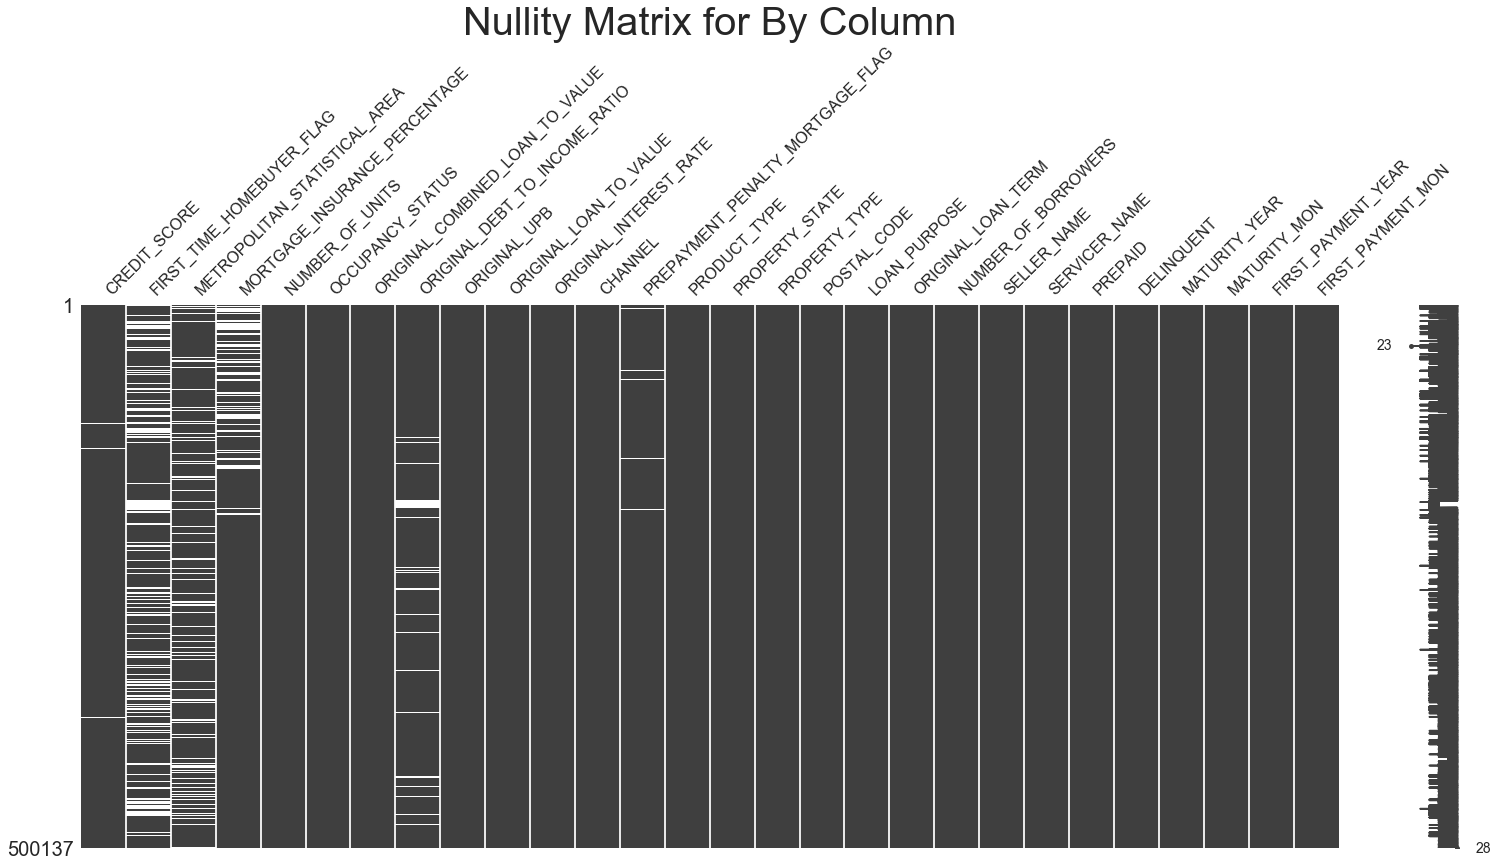

In [63]:
g = msno.matrix(df)
g.axes.set_title("Nullity Matrix for By Column",fontsize=40);


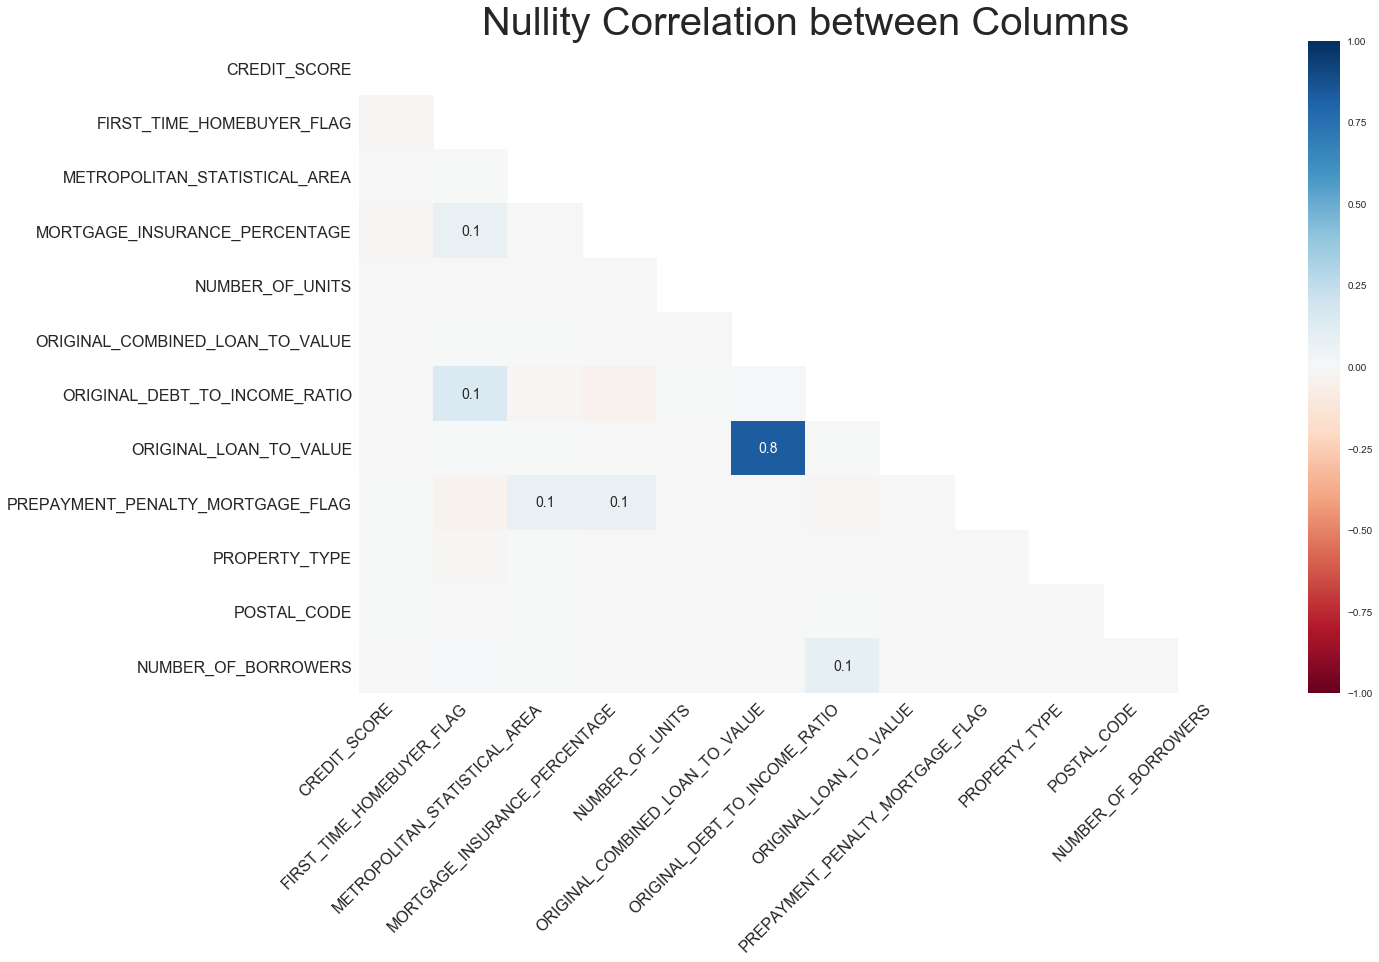

In [62]:

g = msno.heatmap(df)
g.axes.set_title("Nullity Correlation between Columns",fontsize=40);


The first figure show that:

- `CREDIT_SCORE`, `FIRST_TIME_HOMEBUYER_FLAG`, `METROPOLITAN_STATISTICAL_AREA`, `MORTGAGE_INSURANCE_PERCENTAGE`,  `ORIGINAL_DEBT_TO_INCOME_RATIO`, and `PREPAYMENT_PENTALTY_MORTGAGE_FLAG` have a lot of missing values. 

This answers our first question. ✔

<hr>

The second figure show that:

- There doesn't seem to be a strong correlation between columns for missing values, except for `ORIGINAL_COMBINED_LOAN_TO_VALUE` and `ORIGINAL_LOAN_TO_VALUE`.

This answers our third question. ✔

<hr>

To check for our second question, let's count the number of missing values in each column and make a table.

For clarity also remove all columns with no missing values




In [17]:
missing_count_df = pd.DataFrame(df.isna().sum(),columns=["#Missing Values"])
missing_count_df[(missing_count_df.T != 0).any()]

,#Missing Values
CREDIT_SCORE,2711
FIRST_TIME_HOMEBUYER_FLAG,130559
METROPOLITAN_STATISTICAL_AREA,70149
MORTGAGE_INSURANCE_PERCENTAGE,51048
NUMBER_OF_UNITS,3
ORIGINAL_COMBINED_LOAN_TO_VALUE,13
ORIGINAL_DEBT_TO_INCOME_RATIO,14929
ORIGINAL_LOAN_TO_VALUE,9
PREPAYMENT_PENALTY_MORTGAGE_FLAG,5178
PROPERTY_TYPE,95


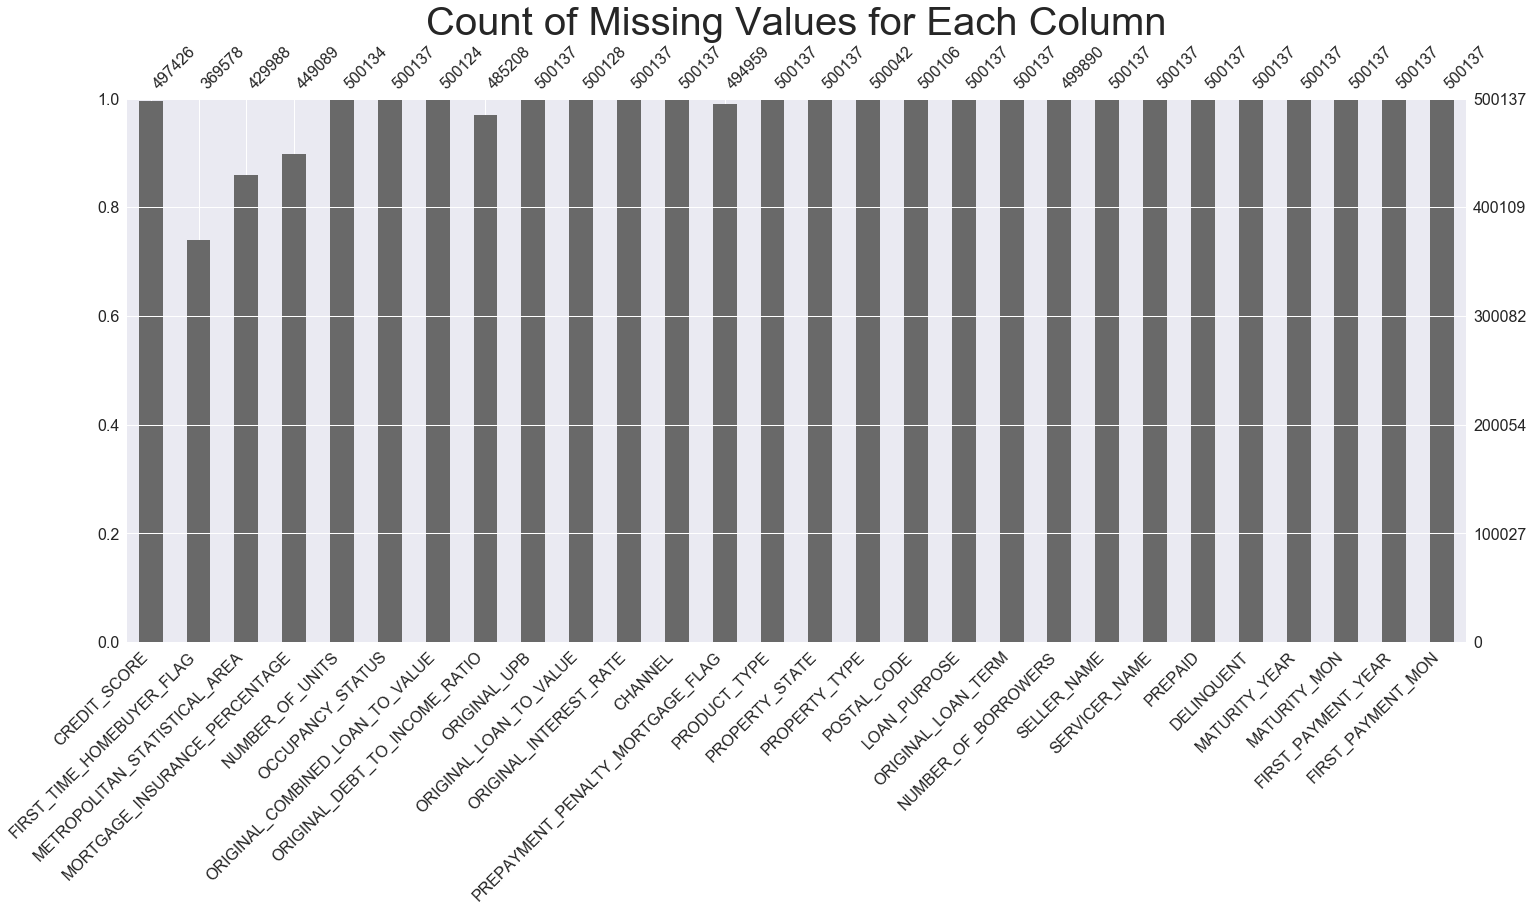

In [46]:
g = msno.bar(df);
g.set_title("Count of Missing Values for Each Column",fontsize=40);

This answers our second question. ✔

<h2 align="center">
 Fill missing data and convert categorical data to dummies 🧰
</h2>
<hr>

So now to get the data ready for ml lets to start by filling missing values first

Then convert the numerical data into number by performing one-hot encoding. 


In [20]:
train, test, encoder = get_train_test_split_for_ml(df,2000,True,True)

In [25]:
joined_filled_df = pd.concat((train,test))
missing_count_df = pd.DataFrame(joined_filled_df.isna().sum(),columns=["#Missing Values"])
missing_count_df[(missing_count_df.T != 0).any()]

,#Missing Values


Awesome we filled all of the data columns and we have no more missing values.

Note when filling columns make sure you get the values from train set only to reduce data leakage. 

Let check out our cleaned data:

In [40]:
train.head()

,CREDIT_SCORE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,POSTAL_CODE,...,x9_GMACMTGECORP,"x9_HOMESIDELENDING,INC","x9_JPMORGANCHASEBANK,NA",x9_NATLCITYMTGECO,x9_Other servicers,x9_PRINCIPALRESIDENTIAL,"x9_SUNTRUSTMORTGAGE,INC",x9_WASHINGTONMUTUALBANK,"x9_WELLSFARGOBANK,NA",x9_WELLSFARGOHOMEMORTGA
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,
F199Q1000005,732.0,17140.0,0.0,1.0,25.0,10.0,53000,25.0,6.500,45200.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
F199Q1000032,765.0,49700.0,0.0,1.0,50.0,26.0,112000,50.0,6.625,95900.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
F199Q1000036,787.0,12060.0,0.0,1.0,80.0,18.0,124000,80.0,6.750,30500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F199Q1000037,730.0,16620.0,30.0,1.0,94.0,29.0,138000,94.0,7.000,25300.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
F199Q1000041,706.0,33340.0,30.0,1.0,93.0,28.0,103000,93.0,7.125,53200.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
test.head()

,CREDIT_SCORE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,POSTAL_CODE,...,x9_GMACMTGECORP,"x9_HOMESIDELENDING,INC","x9_JPMORGANCHASEBANK,NA",x9_NATLCITYMTGECO,x9_Other servicers,x9_PRINCIPALRESIDENTIAL,"x9_SUNTRUSTMORTGAGE,INC",x9_WASHINGTONMUTUALBANK,"x9_WELLSFARGOBANK,NA",x9_WELLSFARGOHOMEMORTGA
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,
F199Q1000004,669.0,16974.0,0.0,1.0,80.0,33.0,162000,80.0,7.120,26100.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
F199Q1000007,679.0,15940.0,30.0,1.0,91.0,48.0,133000,91.0,6.750,44700.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
F199Q1000013,721.0,38060.0,0.0,1.0,39.0,13.0,174000,39.0,6.625,85200.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
F199Q1000015,618.0,10420.0,25.0,1.0,85.0,24.0,122000,85.0,6.375,44200.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
F199Q1000016,738.0,10420.0,0.0,1.0,73.0,44.0,218000,73.0,6.000,44300.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<h2 align="center">
 EDA 🤠
</h2>
<p align="center">
<img src="https://media.giphy.com/media/l4KibOaou932EC7Dy/giphy.gif" width="40" height="40" />

</p>

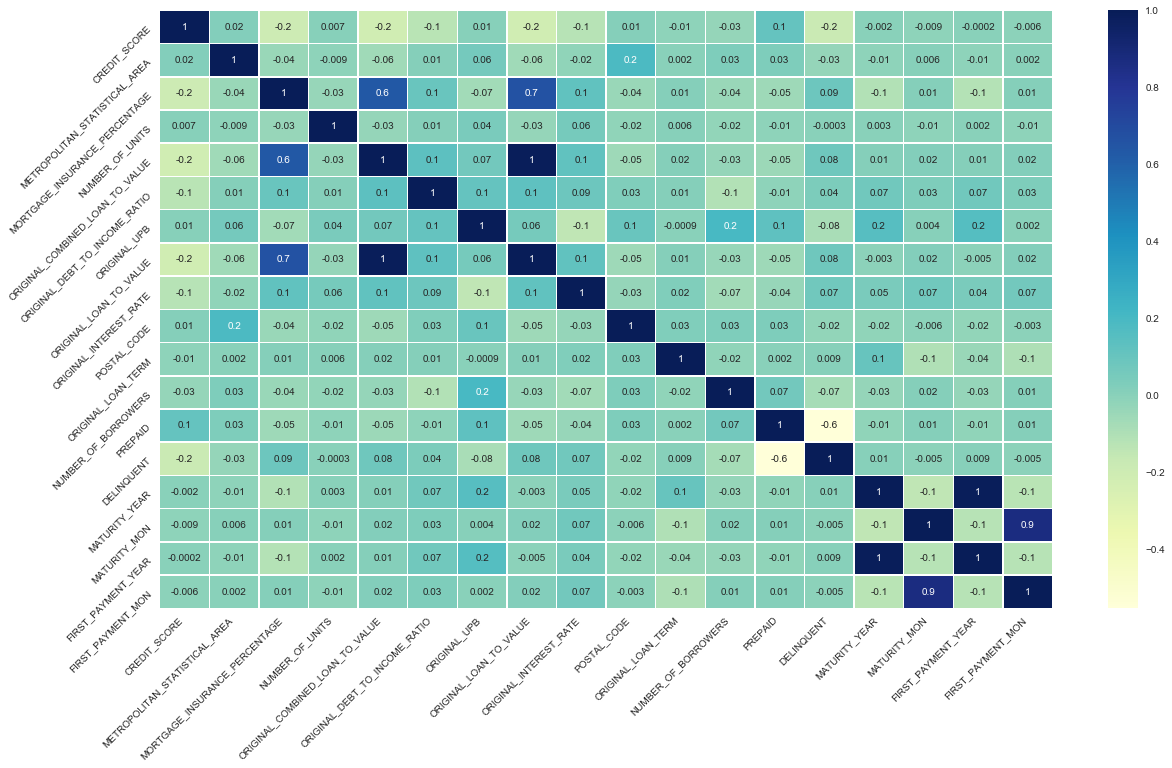

In [57]:
#Correlation Matrix
plt.subplots(figsize = (20,11))
g = sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu", fmt = '.1g', linewidths=.5,)

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right');

In [43]:
reg = logit('DELINQUENT ~ CREDIT_SCORE+FIRST_TIME_HOMEBUYER_FLAG+METROPOLITAN_STATISTICAL_AREA+MORTGAGE_INSURANCE_PERCENTAGE+NUMBER_OF_UNITS+OCCUPANCY_STATUS+ORIGINAL_COMBINED_LOAN_TO_VALUE+ORIGINAL_DEBT_TO_INCOME_RATIO+ORIGINAL_UPB+ORIGINAL_LOAN_TO_VALUE+ORIGINAL_INTEREST_RATE+CHANNEL+PREPAYMENT_PENALTY_MORTGAGE_FLAG+PRODUCT_TYPE+PROPERTY_TYPE+POSTAL_CODE+LOAN_PURPOSE+ORIGINAL_LOAN_TERM+NUMBER_OF_BORROWERS+SELLER_NAME+SERVICER_NAME', df)
reg_fit = reg.fit()
reg_fit.summary()

Optimization terminated successfully.
         Current function value: 0.119220
         Iterations 10


/home/afiglarz/miniconda3/envs/fixed/lib/python3.8/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/home/afiglarz/miniconda3/envs/fixed/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/afiglarz/miniconda3/envs/fixed/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/afiglarz/miniconda3/envs/fixed/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             DELINQUENT   No. Observations:               280973
Model:                          Logit   Df Residuals:                   280875
Method:                           MLE   Df Model:                           97
Date:                Thu, 14 May 2020   Pseudo R-squ.:                  0.2152
Time:                        14:41:10   Log-Likelihood:                -33497.
converged:                       True   LL-Null:                       -42681.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.3408      4.354     -0.997      0.319     -12.874       4.193
FIRST_TIME_HOMEBUYER_FLAG[T.Y]           -0.0245      0.025     -0.977      0.329      -0.074       0.025
OCCUPANCY_STATUS[T.O]                    -0.4215      0.037    -11.543      0.000      -0.493      -0.350
OCCUPANCY_STATUS[T.S]                    -0.2497      0.223     -1.119      0.263      -0.687       0.188
CHANNEL[T.C]                             -0.9752        nan        nan        nan         nan         nan
CHANNEL[T.R]                             -0.6559      1.551     -0.423      0.672      -3.695       2.383
CHANNEL[T.T]                             -0.5190      0.690     -0.752      0.452      -1.872       0.834
PREPAYMENT_PENALTY_MORTGAGE_FLAG[T.Y]    -0.2724      0.250     -1.090      0.276      -0.762       0.218
PROPERTY_TYPE[T.CP]                      -0.3939      0.487     -0.809      0.419      -1.349       0.561
PROPERTY_TYPE[T.LH]                       1.3517      0.441      3.065      0.002       0.487       2.216
PROPERTY_TYPE[T.MH]                       1.0797      0.259      4.174      0.000       0.573       1.587
PROPERTY_TYPE[T.PU]                       0.4752      0.068      7.028      0.000       0.343       0.608
PROPERTY_TYPE[T.SF]                       0.6086      0.066      9.157      0.000       0.478       0.739
LOAN_PURPOSE[T.N]                        -0.1939      0.033     -5.864      0.000      -0.259      -0.129
LOAN_PURPOSE[T.P]                        -0.5536      0.036    -15.547      0.000      -0.623      -0.484
SELLER_NAME[T.ACCUBANC MORTGAGE CO]      -0.3537      0.201     -1.762      0.078      -0.747       0.040
SELLER_NAME[T.BANKAMERICA MORTGAGE]      -0.6924      0.205     -3.380      0.001      -1.094      -0.291
SELLER_NAME[T.BANKOFAMERICA,NA]          -1.0311      0.121     -8.530      0.000      -1.268      -0.794
SELLER_NAME[T.BISHOP'S GATE RESIDE]      -0.7276      0.097     -7.529      0.000      -0.917      -0.538
SELLER_NAME[T.BISHOPSGATERESIDENTI]      -1.3944      0.172     -8.089      0.000      -1.732      -1.057
SELLER_NAME[T.BRANCHBANKING&TRUSTC]      -1.9221      0.413     -4.654      0.000      -2.732      -1.113
SELLER_NAME[T.CHASE MANHATTAN MORT]      -0.0633      0.133     -0.477      0.633      -0.323       0.197
SELLER_NAME[T.CHASEMANHATTANMTGECO]      -0.0719      0.066     -1.082      0.279      -0.202       0.058
SELLER_NAME[T.COUNTRYWIDE]                0.0039      0.189      0.021      0.984      -0.367       0.375
SELLER_NAME[T.COUNTRYWIDE HOME LOA]       0.4871      0.110      4.412      0.000       0.271       0.703
SELLER_NAME[T.CROSSLAND MORTGAGE C]      -0.1509      0.106     -1.427      0.154      -0.358       0.056
SELLER_NAME[T.CROSSLANDMTGECORP]         -0.3069      0.172     -1.782      0.075      -0.644       0.031
SELLER_NAME[T.FIFTHTHIRDBANK]            -1.8185      0.412  

<h2 align="center">
 Hypothesis testing 🔬
</h2>
<p align="center">
<img src="https://media.giphy.com/media/7MZ0v9KynmiSA/source.gif" width="40" height="40" />
</p>

<h2 align="center">
 Machine learning 🤖
</h2>
<p align="center">
<img src="https://media.giphy.com/media/ckJF143W1gBS8Hk833/source.gif
" width="40" height="40" />
</p>

<h2 align="center">
 Conclusion 👋
</h2>
<p align="center">
<img src="https://media.giphy.com/media/jUwpNzg9IcyrK/source.gif" width="40" height="40" />
</p>